In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df = pd.read_csv("D:/work/DATA_SCIENCE/practice_file/case_studies/ML/Bank_Data/Bank-full.csv",delimiter=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.isnull().value_counts()

age    job    marital  education  default  balance  housing  loan   contact  day    month  duration  campaign  pdays  previous  poutcome  y    
False  False  False    False      False    False    False    False  False    False  False  False     False     False  False     False     False    45211
dtype: int64

In [5]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [6]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
b = df.groupby('job')['balance'].sum()
b

job
admin.            5873423
blue-collar      10499141
entrepreneur      2262426
housemaid         1726570
management       16680288
retired           4492263
self-employed     2602146
services          4141904
student           1302001
technician        9516246
unemployed        1982835
unknown            510439
Name: balance, dtype: int64

In [8]:
c = np.sort(df['job'].unique())
c

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [9]:
# plt.rcParams['figure.figsize'][0]=15
# plt.bar(df['job'],df['balance'])
# plt.show()

<ipython-input-90-c915ab6f1682>:4: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[c[i],b[i]+.1],s = b[i])


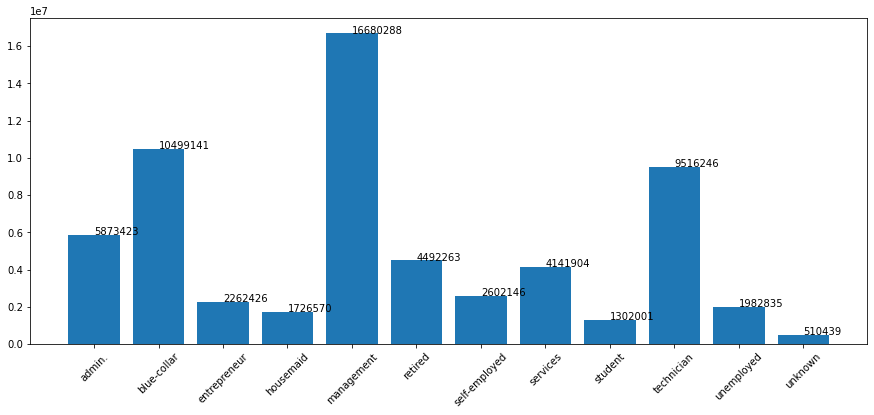

In [90]:
plt.rcParams['figure.figsize'][0]=15
plt.bar(c,b)
for i in range(len(b)):
    plt.annotate(xy=[c[i],b[i]+.1],s = b[i])
plt.xticks(rotation=45)
plt.show()

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
le = LabelEncoder()
df['subs_term_deposit'] =le.fit_transform(df['y']) 

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,subs_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [15]:
df.corr()['subs_term_deposit'].abs().sort_values()

age                  0.025155
day                  0.028348
balance              0.052838
campaign             0.073172
previous             0.093236
pdays                0.103621
duration             0.394521
subs_term_deposit    1.000000
Name: subs_term_deposit, dtype: float64

In [16]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,subs_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


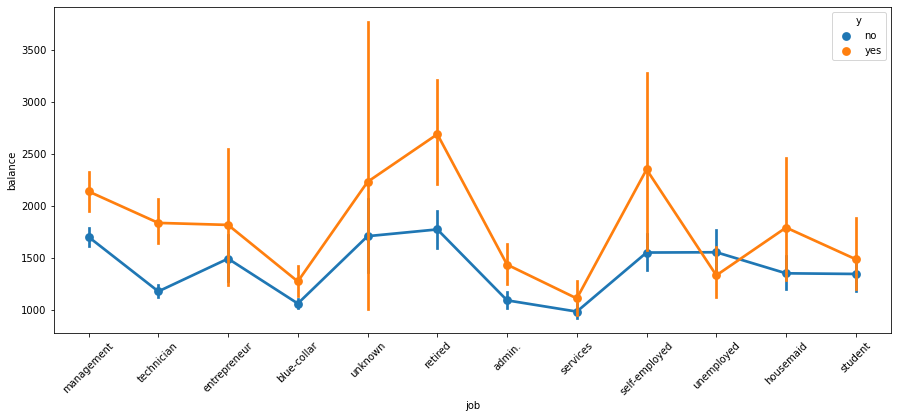

In [92]:
sns.pointplot(x=df['job'],y=df['balance'],hue=df['y'])
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='age', ylabel='balance'>

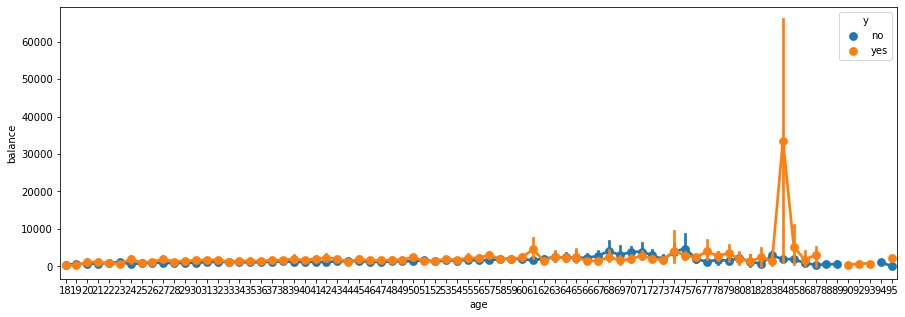

In [41]:
plt.rcParams['figure.figsize'][0] = 15
sns.pointplot(x=df['age'],y=df['balance'],hue=df['y'])

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'subs_term_deposit'],
      dtype='object')

<AxesSubplot:xlabel='job', ylabel='balance'>

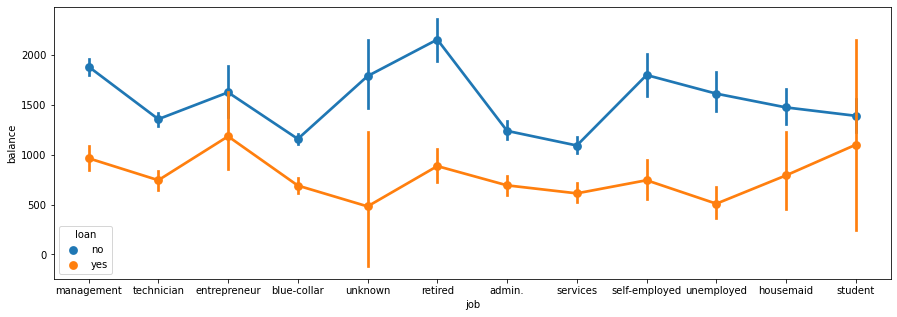

In [43]:
sns.pointplot(x=df['job'],y=df['balance'],hue=df['loan'])

In [22]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,subs_term_deposit
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [23]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,subs_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


<AxesSubplot:xlabel='day', ylabel='balance'>

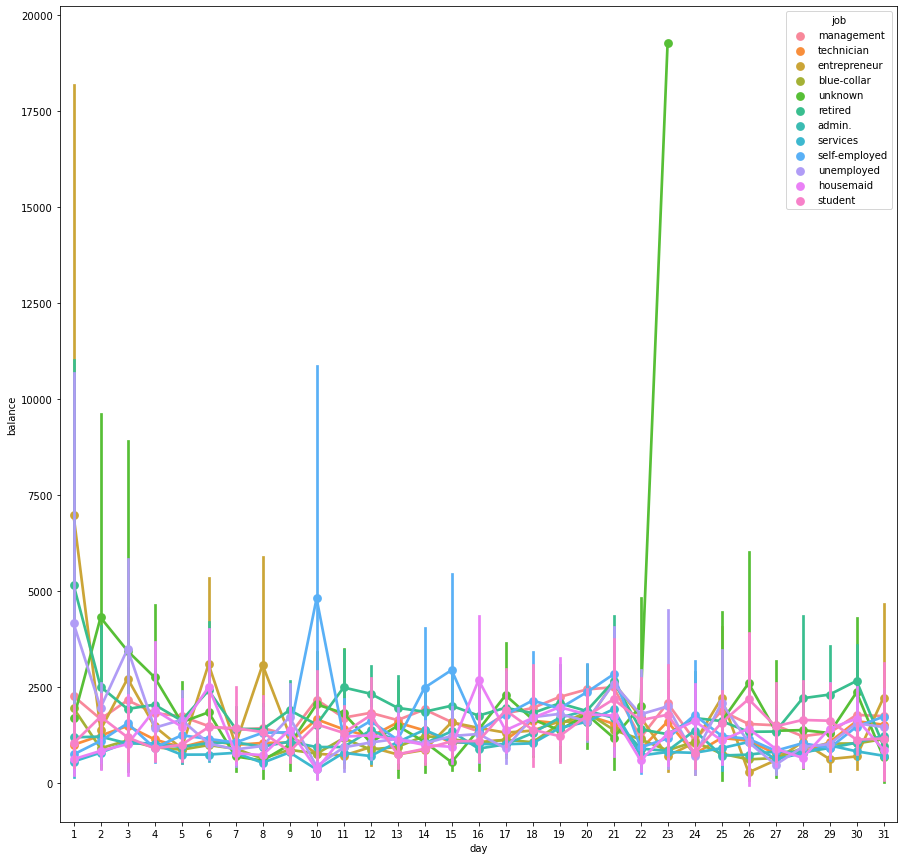

In [44]:
plt.rcParams['figure.figsize'][1] = 15
sns.pointplot(x=df['day'],y=df['balance'],hue=df['job'])

<AxesSubplot:xlabel='day', ylabel='balance'>

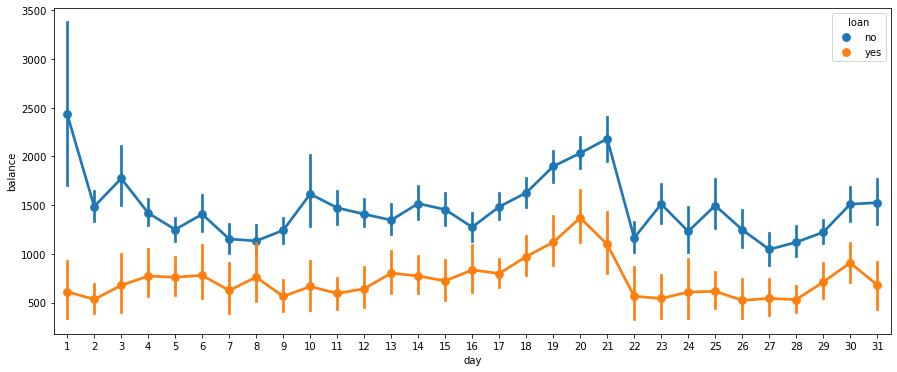

In [47]:
plt.rcParams['figure.figsize'][1] = 6
sns.pointplot(x=df['day'],y=df['balance'],hue=df['loan'])

<AxesSubplot:xlabel='month', ylabel='balance'>

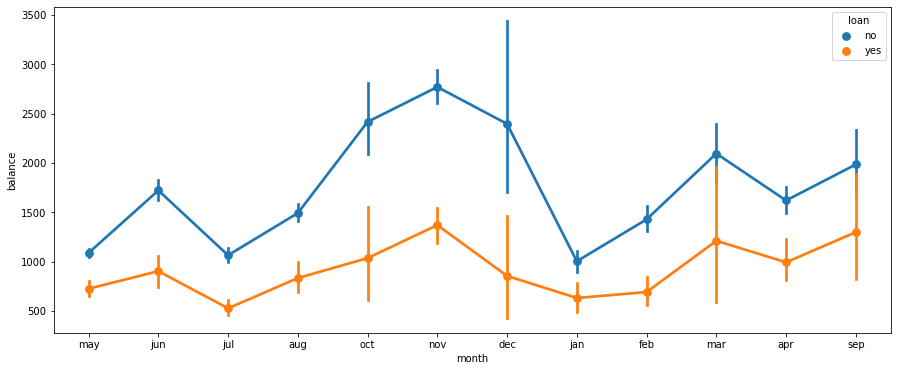

In [48]:

sns.pointplot(x=df['month'],y=df['balance'],hue=df['loan'])

In [27]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,subs_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0


<AxesSubplot:xlabel='marital', ylabel='balance'>

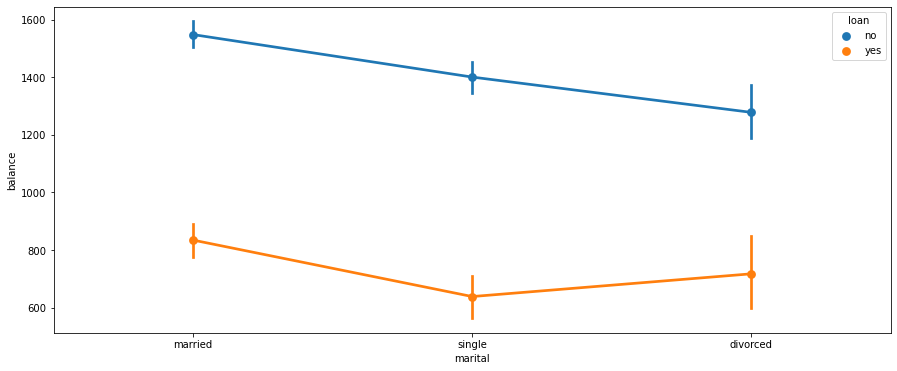

In [49]:
sns.pointplot(x=df['marital'],y=df['balance'],hue=df['loan'])

<AxesSubplot:xlabel='education', ylabel='balance'>

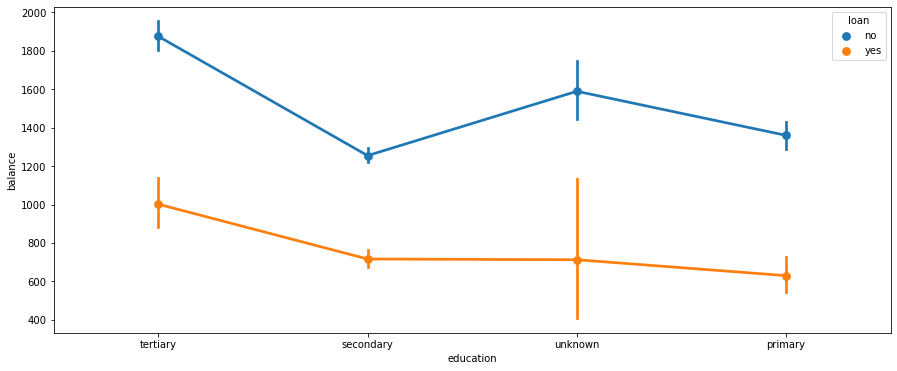

In [50]:
sns.pointplot(x=df['education'],y=df['balance'],hue=df['loan'])

In [30]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,subs_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0


In [31]:
df.corr()['subs_term_deposit'].abs().sort_values()

age                  0.025155
day                  0.028348
balance              0.052838
campaign             0.073172
previous             0.093236
pdays                0.103621
duration             0.394521
subs_term_deposit    1.000000
Name: subs_term_deposit, dtype: float64

In [32]:
x = df.loc[:,['age','day','balance','campaign','previous','pdays','duration']]

In [33]:
y = df['subs_term_deposit']

In [34]:
x.shape

(45211, 7)

In [35]:
y.shape

(45211,)

In [36]:
lr = LogisticRegression(max_iter=1000)

In [37]:
lr.get_params().items()

dict_items([('C', 1.0), ('class_weight', None), ('dual', False), ('fit_intercept', True), ('intercept_scaling', 1), ('l1_ratio', None), ('max_iter', 1000), ('multi_class', 'auto'), ('n_jobs', None), ('penalty', 'l2'), ('random_state', None), ('solver', 'lbfgs'), ('tol', 0.0001), ('verbose', 0), ('warm_start', False)])

In [38]:
cross_val_score(lr,x,y,cv =10,scoring="accuracy")

array([0.90822645, 0.90555187, 0.90466711, 0.88564477, 0.89714665,
       0.88321168, 0.867286  , 0.87016147, 0.86994028, 0.87148861])

In [52]:
rf = RandomForestClassifier()

In [53]:
rf.get_params().items()

dict_items([('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', None), ('criterion', 'gini'), ('max_depth', None), ('max_features', 'auto'), ('max_leaf_nodes', None), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_impurity_split', None), ('min_samples_leaf', 1), ('min_samples_split', 2), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 100), ('n_jobs', None), ('oob_score', False), ('random_state', None), ('verbose', 0), ('warm_start', False)])

In [54]:
cross_val_score(rf,x,y,cv = 10,scoring="accuracy")

array([0.89252543, 0.87900907, 0.88299049, 0.87436408, 0.86573767,
       0.88984738, 0.84251272, 0.87436408, 0.85268746, 0.67794736])

In [55]:
# logistic Regression was quite good 

In [56]:
lr.fit(x,y)

LogisticRegression(max_iter=1000)

In [58]:
lr.score(x,y)

0.8890756674260689

In [59]:
df1 = pd.read_csv("D:/work/DATA_SCIENCE/practice_file/case_studies/ML/Bank_Data/bank.csv",delimiter=";")

In [60]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [65]:
df1['subs_term_deposit'] = le.fit_transform(df1['y'])

In [66]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,subs_term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


In [68]:
x1 = df1.loc[:,['age','day','balance','campaign','previous','pdays','duration']]

In [77]:
y1 = df1['subs_term_deposit']

In [78]:
df1['predicted']=lr.predict(x1)

In [79]:
accuracy_score(df1['predicted'],y1)

0.8876354788763547

In [80]:
print(classification_report(df1['predicted'],y1))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      4362
           1       0.17      0.54      0.25       159

    accuracy                           0.89      4521
   macro avg       0.57      0.72      0.60      4521
weighted avg       0.95      0.89      0.92      4521

